In [18]:
import torch
import models
import image_loader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
model = models.Autoencoder()
model.load_state_dict(torch.load('../trained-models/covid-autoencoder/20201111-144840'))

<All keys matched successfully>

In [20]:
val_img_folder, val_dataset = image_loader.get_image_dataset(root_dir='..\images', split='train', batch_size=1, num_workers=0)

['covid', 'non_covid']


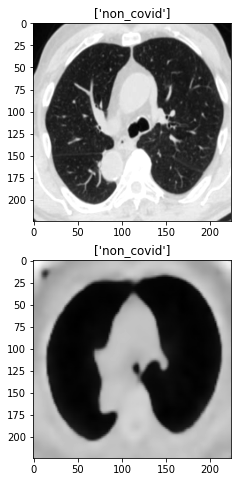

In [21]:

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp, cmap='gray')
    mean = np.array([0.63886562])
    std = np.array([0.27450625])
    inp = std * inp + mean
    plt.imshow(inp, cmap='gray')
    if title is not None:
        plt.title(title)
    #plt.pause(5)

class_names = val_img_folder.classes
# Get a batch of training data
inputs, classes = next(iter(val_dataset))
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(2, 1, 1)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])

inputs = model(inputs).detach()

# # Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# print(out.shape)
fig.add_subplot(2, 1, 2)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])

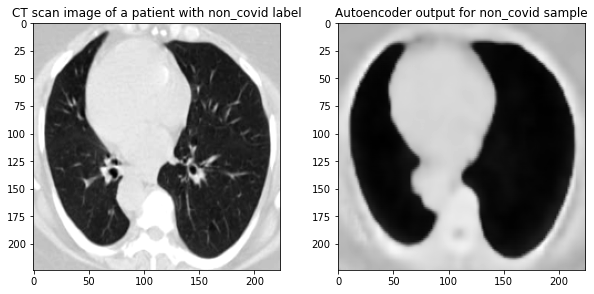

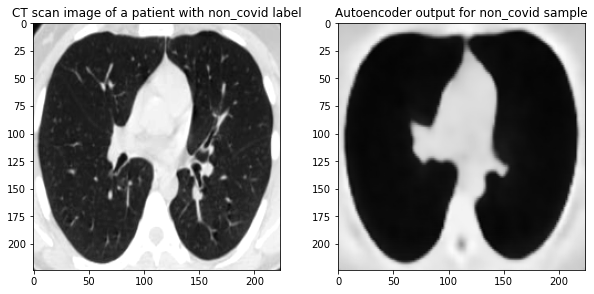

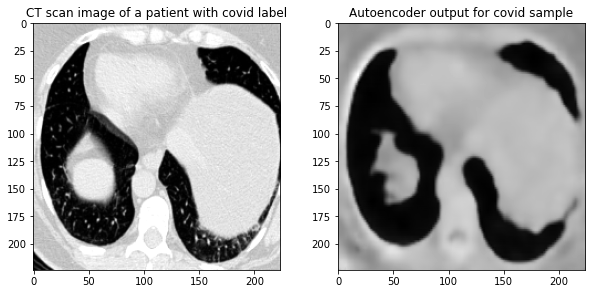

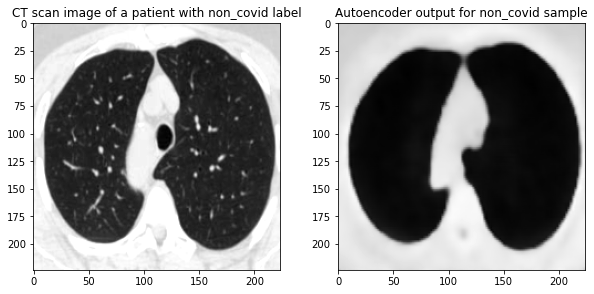

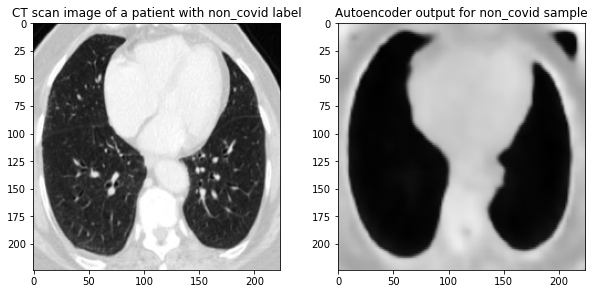

In [10]:

for i in range(5):
    fig=plt.figure(figsize=(20, 10))
    class_names = val_img_folder.classes
    # Get a batch of training data
    inputs, classes = next(iter(val_dataset))
    out = inputs[0, :, :, :]
    fig.add_subplot(2, 2,1)
    imshow(out, title='CT scan image of a patient with ' + [class_names[x] for x in classes][0] + ' label')

    inputs = model(inputs).detach()

    # # Make a grid from batch
    # out = torchvision.utils.make_grid(inputs)
    # print(out.shape)
    fig.add_subplot(2, 1, 1)
    out = inputs[0, :, :, :]
    imshow(out, title='Autoencoder output for ' + [class_names[x] for x in classes][0] + ' sample')

    plt.savefig('../outputs/autoencoder_outputs_' + str(i) + '.png')

In [7]:
import data_transforms
from torchvision import datasets, models, transforms
mean, std = [0.63886562], [0.27450625]
transforms = data_transforms.get_train_transforms((224, 224), mean, std)
img_folder = datasets.ImageFolder(os.path.join('../', 'sample_images'), transforms)
print(img_folder.classes)

dataset = torch.utils.data.DataLoader(img_folder, batch_size=1, shuffle=False, num_workers=0)
non_transformed_dataset = torch.utils.data.DataLoader(datasets.ImageFolder(os.path.join('../', 'sample_images'), data_transforms.get_no_transforms()), batch_size=1, shuffle=False, num_workers=0)

['COVIDNegative', 'COVIDPositive']


tensor(-0.0527)
tensor(0.5802)
tensor(-0.4234)
tensor(0.5791)
tensor(0.2688)
tensor(0.7479)
tensor(-0.2073)
tensor(0.5426)
tensor(-0.4814)
tensor(0.5191)


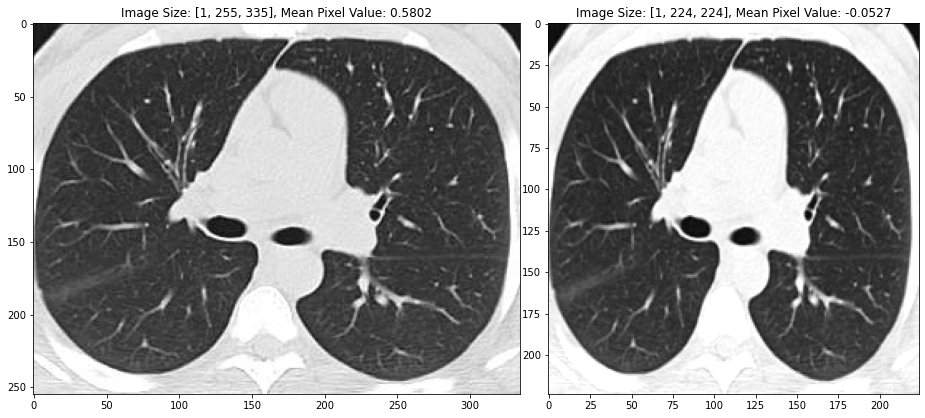

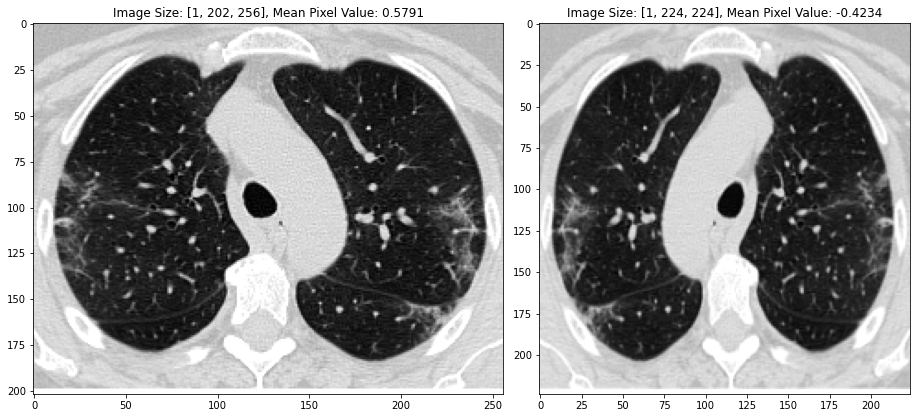

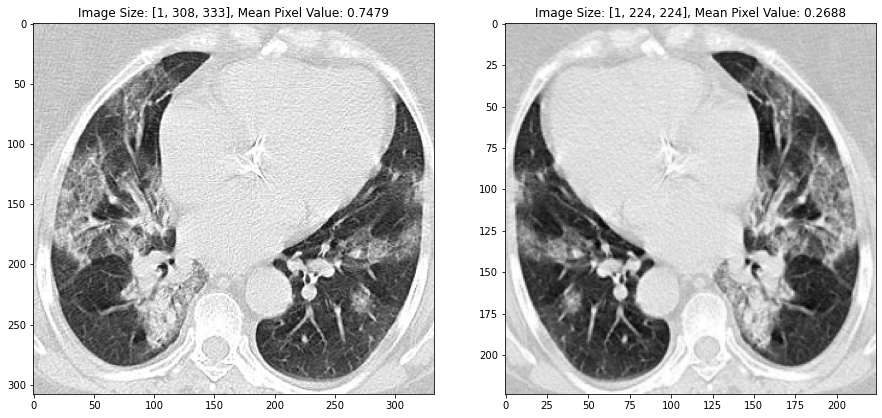

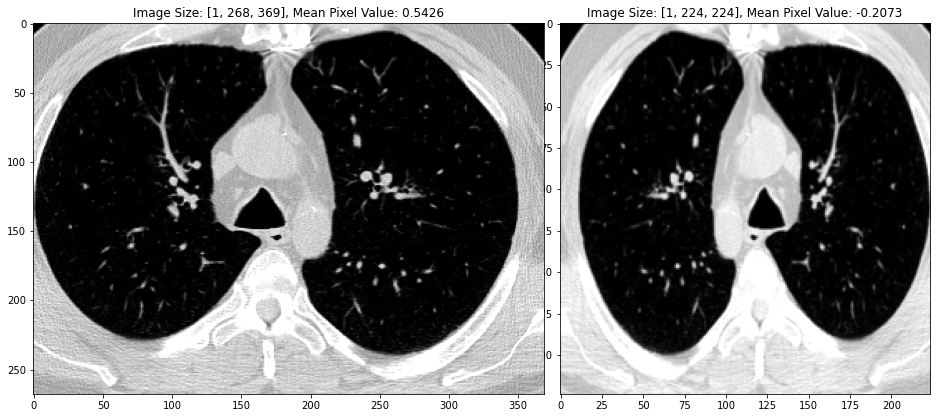

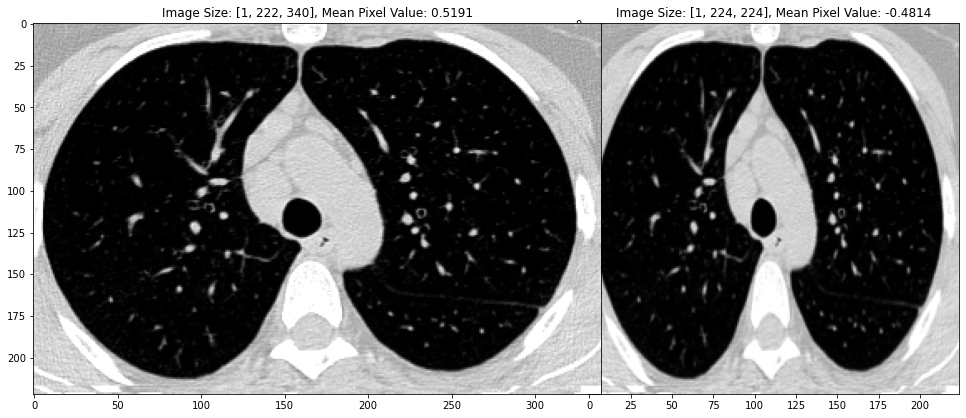

In [10]:
class_names = val_img_folder.classes
# Get a batch of training data
dataset = iter(dataset)
non_transformed_dataset = iter(non_transformed_dataset)

for i in range(5):
    inputs, classes = next(dataset)
    nt_inputs, classes = next(non_transformed_dataset)
    fig=plt.figure(figsize=(30, 15))
    out = inputs[0, :, :, :]
    print(torch.mean(out))
    fig.add_subplot(2, 1,1)
    imshow(out, title='Image Size: {}, Mean Pixel Value: {}'.format(list(out.shape), round(float(torch.mean(out).numpy()), 4)))

    
    fig.add_subplot(2, 2, 1)
    out = nt_inputs[0, :, :, :]
    print(torch.mean(out))
    imshow(out, title='Image Size: {}, Mean Pixel Value: {}'.format(list(out.shape), round(float(torch.mean(out).numpy()), 4)))
    plt.savefig('../outputs/transforms_' + str(i) + '.png')